<a href="https://colab.research.google.com/github/sadman-02/SML-413/blob/main/SML_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: MD. Sadman Sakib

ID : 2215151002

SECTION: 7A1

BATCH : 51

COURSE : Simulation & Modeling Lab

In [4]:
import numpy as np

QUESTION

Generate two sets of from a normal distribution and perform a two-sample t-test.

* Randomly generate 50 values from a normal distribution with a chosen mean (μ1) and standard deviation.
* Randomly generate 50 values from a normal distribution with a different mean (μ2) and standard deviation.

Use and determine whether the means differ significantly

In [5]:
from scipy import stats
import matplotlib.pyplot as plt

Sample 1 Mean: 12.7800
Sample 2 Mean: 14.5200
t-Statistic: -5.5357
Degrees of Freedom: 5.0260
p-Value: 0.0026
Confidence Interval of Mean Difference: [-2.5467, -0.9333]
Reject the null hypothesis. The means of the two samples are significantly different.


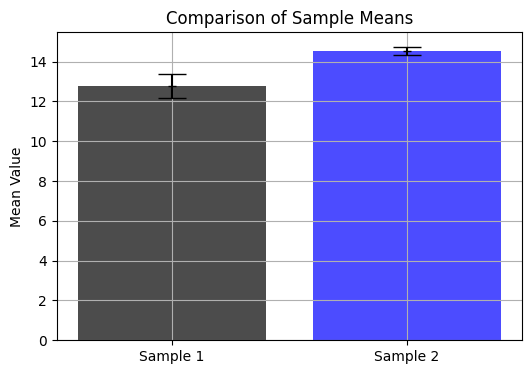

In [6]:
data1 = np.array([12.5, 13.2, 11.8, 13.5, 12.9])
data2 = np.array( [14.2, 14.8, 14.5, 14.7, 14.4])

t_statistic, p_value = stats.ttest_ind(data1, data2, equal_var=False)

mean_diff = np.mean(data1) - np.mean(data2)
std_err = np.sqrt(np.var(data1, ddof=1)/len(data1) + np.var(data2, ddof=1)/len(data2))
df = (std_err**4) / ((np.var(data1, ddof=1)/len(data1))**2 / (len(data1)-1) + (np.var(data2, ddof=1)/len(data2))**2 / (len(data2)-1))
ci = stats.t.interval(0.95, df, loc=mean_diff, scale=std_err)

print(f"Sample 1 Mean: {np.mean(data1):.4f}")
print(f"Sample 2 Mean: {np.mean(data2):.4f}")
print(f"t-Statistic: {t_statistic:.4f}")
print(f"Degrees of Freedom: {df:.4f}")
print(f"p-Value: {p_value:.4f}")
print(f"Confidence Interval of Mean Difference: [{ci[0]:.4f}, {ci[1]:.4f}]")

alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. The means of the two samples are significantly different.')
else:
    print('Fail to reject the null hypothesis. The means of the two samples are not significantly different.')
plt.figure(figsize=(6, 4))
plt.bar(["Sample 1", "Sample 2"], [np.mean(data1), np.mean(data2)], color=['black', 'blue'], alpha=0.7)
plt.errorbar([0, 1], [np.mean(data1), np.mean(data2)], yerr=[np.std(data1), np.std(data2)], fmt='k_', capsize=10)
plt.title('Comparison of Sample Means')
plt.ylabel('Mean Value')
plt.grid(True)
plt.show()